# Case 1

## Library

In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.feature_selection import SelectKBest, mutual_info_classif

## Load Dataset

In [2]:
data = pd.read_csv('/kaggle/input/accelerometer-data/accelerometer_data.csv')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = data.drop(columns=['Activity', 'subject'], errors='ignore')  # Drop non-feature columns
y = data['Activity']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape, X_scaled[:5], y_encoded[:5]

((2947, 561),
 array([[-0.2777081 , -0.21063123,  2.19307573, ..., -0.40479042,
          0.62272321, -0.0383485 ],
        [ 0.19865964,  0.18259066, -0.25026383, ..., -0.36173867,
          0.63673075, -0.14570918],
        [ 0.02458676, -0.31805537, -0.22848456, ..., -0.37093228,
          0.63284514, -0.12685534],
        [-0.06105694, -0.57303707, -0.21370947, ..., -0.36343378,
          0.64527635, -0.11758463],
        [ 0.01382276, -0.38788085, -0.49463907, ..., -0.35025636,
          0.6656567 , -0.10411803]]),
 array([2, 2, 2, 2, 2]))

### Feature Selection

In [ ]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y_encoded)

selected_features_mask = lasso.coef_ != 0
selected_feature_names = X.columns[selected_features_mask] if hasattr(X, 'columns') else None

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8436916546505415, tolerance: 0.7005546881629183
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.786188669551052, tolerance: 0.7005546881629183
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7782870600409524, tolerance: 0.7005546881629183
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergen

In [ ]:
print(f"Jumlah fitur yang dipilih: {selected_features_mask.sum()}")
if selected_feature_names is not None:
    print(f"Nama fitur yang dipilih: {selected_feature_names.tolist()}")

X_selected = X_scaled[:, selected_features_mask]
X_selected.shape, X_selected[:5]

Jumlah fitur yang dipilih: 231
Nama fitur yang dipilih: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-X', 'tGravityAcc-std()-Z', 'tGravityAcc-min()-Y', 'tGravityAcc-sma()', 'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Z', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y', 'tGravityAcc-entropy()-Z', 'tGravityAcc-arCoeff()-X,1', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,4', 'tGravityAcc-correlation()-X,Y', 'tGravityAcc-correlation()-X,Z', 'tGravityAcc-correlation()-Y,Z'

((2947, 231),
 array([[-0.2777081 ,  2.19307573, -0.78726748, ..., -1.36390046,
          0.57548662, -0.40479042],
        [ 0.19865964, -0.25026383, -0.87698449, ..., -0.74723226,
          1.87119239, -0.36173867],
        [ 0.02458676, -0.22848456, -0.92159817, ...,  0.03791916,
          0.32393752, -0.37093228],
        [-0.06105694, -0.21370947, -0.92383742, ...,  0.47269453,
          0.62587432, -0.36343378],
        [ 0.01382276, -0.49463907, -0.92167924, ...,  1.09734838,
         -0.20199891, -0.35025636]]))

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=15)
X_selected = selector.fit_transform(X_scaled, y_encoded)

selected_features_mask = selector.get_support()
selected_feature_names = X.columns[selected_features_mask] if hasattr(X, 'columns') else None

print(f"Jumlah fitur yang dipilih: {selected_features_mask.sum()}")
if selected_feature_names is not None:
    print(f"Nama fitur yang dipilih: {selected_feature_names.tolist()}")

X_selected.shape, X_selected[:5]

Jumlah fitur yang dipilih: 15
Nama fitur yang dipilih: ['tBodyAcc-std()-X', 'tBodyAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tBodyAccJerk-max()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccMag-max()', 'tGravityAccMag-max()', 'tBodyAccJerkMag-max()', 'fBodyAcc-energy()-X', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAccMag-mad()']


((2947, 15),
 array([[-0.78726748, -0.82474607, -0.65958816,  0.49242234, -0.66879215,
         -0.59872423,  0.75620665, -0.44925229, -0.44925229, -0.69143883,
         -0.74813523, -0.71677218, -0.74113647, -0.74781111, -0.3054681 ],
        [-0.87698449, -0.82474607, -0.72683216,  0.49242234, -0.66879215,
         -0.6333314 ,  0.80473678, -0.84975009, -0.84975009, -0.75663493,
         -0.75638642, -0.72275945, -0.74826988, -0.75560511, -0.87604141],
        [-0.92159817, -0.91098199, -0.72683216,  0.50086116, -0.66752007,
         -0.8570322 ,  0.82853965, -0.9213348 , -0.9213348 , -0.84630054,
         -0.75809395, -0.72331697, -0.74919641, -0.7568711 , -0.91627059],
        [-0.92383742, -0.90974013, -0.72743769,  0.49808587, -0.69622765,
         -0.8570322 ,  0.82853965, -0.9213348 , -0.9213348 , -0.84630054,
         -0.75813774, -0.72335055, -0.74924024, -0.75690935, -0.91534335],
        [-0.92167924, -0.90974013, -0.74699047,  0.49592195, -0.71223026,
         -0.86344444,

### Splitting Dataset & Encoding

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [13]:
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

## Building Model

In [ ]:
model = Sequential([
    Dense(512, activation='sigmoid', input_shape=(15,)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(len(np.unique(y)), activation='softmax') 
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,062 (707.27 KB)

 Trainable params: 181,062 (707.27 KB)

 Non-trainable params: 0 (0.00 B)

## Model Compile

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_val, y_val_encoded),
    epochs=50, 
    batch_size=32,
    verbose=1
)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2435 - loss: 1.7435 - val_accuracy: 0.4576 - val_loss: 1.1919
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5521 - loss: 1.1159 - val_accuracy: 0.5797 - val_loss: 0.9167
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6145 - loss: 0.8394 - val_accuracy: 0.6576 - val_loss: 0.7347
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6953 - loss: 0.6794 - val_accuracy: 0.6610 - val_loss: 0.6727
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6999 - loss: 0.6296 - val_accuracy: 0.6712 - val_loss: 0.6642
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7226 - loss: 0.5826 - val_accuracy: 0.7390 - val_loss: 0.5638
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7503 - loss: 0.5604 - val_accuracy: 0.7797 - val_loss: 0.5109
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8138 - loss: 0.4700 - val_accuracy: 0.8136 - val_loss:

## Model Evaluation & Classification Reports

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Loss: {test_loss:}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.19710326194763184
Test Accuracy: 0.9084745645523071


In [ ]:
from sklearn.metrics import classification_report

y_pred_encoded = model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)  

y_test_labels = np.argmax(y_test_encoded, axis=1)

report = classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00        56
           SITTING       0.81      0.94      0.87        53
          STANDING       0.92      0.75      0.83        48
           WALKING       0.91      0.93      0.92        44
WALKING_DOWNSTAIRS       0.95      0.90      0.93        42
  WALKING_UPSTAIRS       0.89      0.90      0.90        52

          accuracy                           0.91       295
         macro avg       0.91      0.91      0.91       295
      weighted avg       0.91      0.91      0.91       295



## Plotting

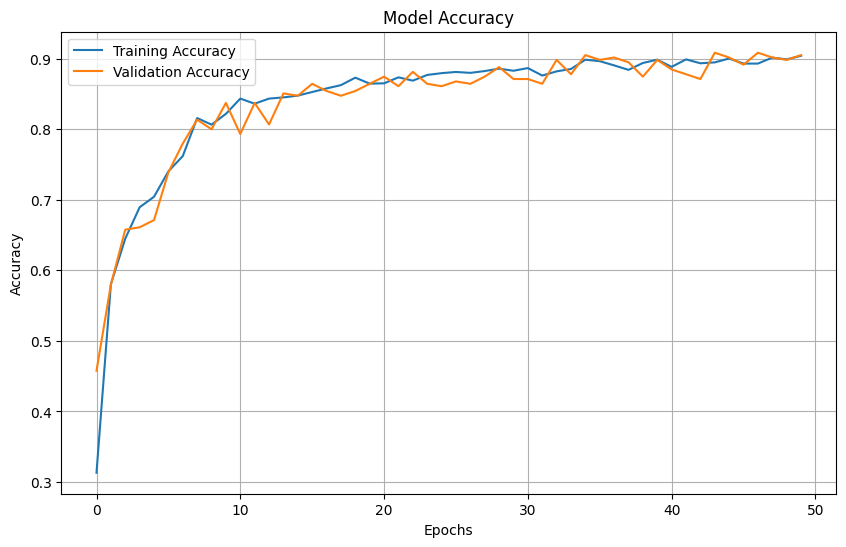

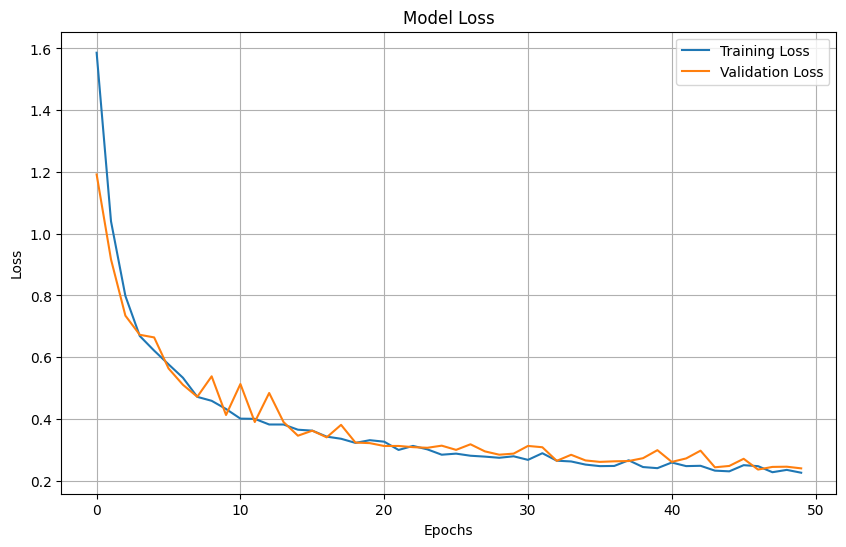

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()

## Kesimpulan

1. Melakukan pemilihan fitur akselerometer yang relevan untuk mengenali aktivitas manusia sebanyak 15 fitur (misalnya, mean dan standar deviasi dari sensor). Fitur-fitur ini dinormalisasi agar nilai-nilainya seimbang, yang penting agar model bekerja lebih optima Di sini saya mencoba menggunakan LassoCV namun saya saat saya coba ternyata saya tidak bisa. Jadi saya memutuhkan untuk menggunakan selector SelectKBest sebagai metode untuk feature selection saya.l.

2. Dataset akan menjadi tiga bagian yaitu train (80%), validation (10%), dan test (10%) untuk memastikan model dilatih dan diuji secara adil.

3. Model yang dipakai akan menggunakan Model neural network yang memiliki 4 hidden layer, mulai dari 512 neuron pada layer pertama, dan setiap layer berikutnya memiliki setengah dari layer neuron sebelumnya. Oupput layer menggunakan softmax untuk klasifikasi aktivitas.

4. Model akan di train selama 50 epoch, dan mencatat akurasi serta loss di setiap epoch untuk melihat performanya. Pada akhir Train model, model diuji pada test set untuk mengukur akurasinya pada data baru.

## Hasil Dari Testing

- Secara keseluruhan, penelitian ini menunjukkan hasil Grafik akurasi dan loss yang membantu untuk mengevaluasi apakah model overfit (terlalu menyesuaikan data latihan) atau underfit (tidak cukup menangkap pola). Idealnya, akurasi training dan validation serupa dan tinggi. Jika akurasi test tinggi dan konsisten dengan validation, model sia

- Dari hasil train dan testing kita mendapatkan hasil yang cukup bagus yang artinya tidak overfit ataupun underfit. Hal itu  bisa saya pastikan karena dari hasil train sebanyak 50 Epochs menunjukan -> accuracy: 0.9030 - loss: 0.2164 - val_accuracy: 0.9051 - val_loss: 0.2401. Perkembangan antara accuracy dengan validation accuracy yang meningkat dan loss dengan validation loss yang menurunl_loss: 0.9058

- Hasil Test Loss Yang sudah di train juga menunjuka0.19710326194763184 atau 19.7%9088796973228455 dan Test A0.9084745645523071 atau 90.8%6000000238418579

- Kita juga bisa melihat Classification Reportnya berdasarkan nilai dari precision, recall, f1- menunjukan bahwa hasil yang di peroleh oleh model cukup bagus dan tidak ada masalahscore, dan support

- Berdasarkan grafik yang ditampilkan dan hasil daritidak  train model, mode overfiting ataupun underfittinglngalami overfitting karena akurasi cukup ta peladengant tingginyan tidak terbawa pada data validasi. Hal ini menusudah cukup baik.baik pada data baru.

# Case 2

## Library

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
img_rows, img_cols = 64,264

data_path = '/kaggle/input/parkinson-xray/parkinson_xray/'
x,y = [], []
classes = os.listdir(data_path)

for (index, class_path) in enumerate(classes):
    for img_path in os.listdir(f"{data_path}{class_path}"):
        path = f"{data_path}{class_path}/{img_path}"
        image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols), color_mode='grayscale')
        image = tf.keras.preprocessing.image.img_to_array(image)

        x.append(image)
        y.append(index)

x = np.array(x)
y = np.array(y)

x = x.astype('float32')/255

## Data Preprocessing

### Splitting Dataset

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

import keras
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)
y_val = keras.utils.to_categorical(y_val, num_classes=2)

print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# # Create data generators
# train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
# val_generator = train_datagen.flow(X_val, y_val, batch_size=32)
# test_generator = train_datagen.flow(X_test, y_test, batch_size=32, shuffle=True)

In [ ]:
X_train.shape
y_train.shape

## Building Model

In [ ]:
model = Sequential([
    Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(64, 264, 1)),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(16, (5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    Flatten(),  
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='relu'),
    Dense(2, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Model Training

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=42,
    epochs=5,
    validation_data=(X_val, y_val)
)

### Model Evaluate

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

## Plotting

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Validation Loss')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

## Model Predict

In [ ]:
prediction = model.predict(X_test)
prediction_labels = np.argmax(prediction, axis=1)

In [ ]:
for i in range(10):
    prediction = classes[prediction_labels[i]]
    actual = classes[np.argmax(y_test[i])]
    print(f"Prediction: {prediction}, Actual: {actual}")

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.grid()
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.title("Accuracy")
plt.show()

In [ ]:
plt.plot(history.history['val_accuracy'], label="Training Loss")
plt.plot(history.history['val_loss'], label='validation loss')
plt.grid()
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.title("Loss")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(X_test)
prediction_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(true_labels, prediction_labels, target_names=classes)
print("\nClassification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, prediction_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Number of samples to display
num_samples = 20  
class_names = ['Normal', 'Pneumonia']  # Adjust as needed for your classes

# Select a subset of the test set
test_images = X_test[:num_samples]
test_labels = y_test[:num_samples]

# Make predictions
predictions = (model.predict(test_images) > 0.5).astype("int32")

# Convert one-hot encoded labels back to integer class labels
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with predicted and actual labels
plt.figure(figsize=(12, 6))
rows, cols = 4, 5  

for i in range(num_samples):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    actual_label = class_names[true_labels[i]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Penjelasan

Model ini menggunakan jaringan saraf konvolusi (CNN) dengan dua lapisan konvolusi dan pooling untuk ekstraksi fitur dari gambar.

1. Input dan Preprocessing: Gambar masuk dalam bentuk grayscale 64x64. Konvolusi pertama memiliki 6 filter berukuran 5x5 dengan padding ‘same’ untuk menjaga dimensi gambar. Fitur dasar seperti tepi dan tekstur diekstrak, lalu di-downsample melalui average pooling (2x2, stride 2) untuk mengurangi dimensi tanpa kehilangan informasi inti.

2. Ekstraksi Fitur: Lapisan konvolusi kedua dengan filter serupa mendeteksi pola lebih kompleks, seperti bentuk atau pola kecil, yang diikuti oleh average pooling untuk lebih lanjut mengurangi dimensi.

3. Flatten dan Dense Layers: Setelah pooling, output di-flatten menjadi vektor 1D, lalu masuk ke tiga fully connected (dense) layers. Lapisan dense berturut-turut (120, 84, dan 10 unit) bertugas untuk menggabungkan fitur-fitur abstrak dan mempersiapkan hasil akhir.

4. Output: Lapisan terakhir dengan satu neuron dan aktivasi sigmoid menghasilkan nilai antara 0 dan 1 untuk klasifikasi biner (Normal atau Pneumonia).

## Hasil Dari Testing Model

- Kita mengetahui bahwa kita medapatkan Model Test Accuracy sebesar 96.07% 
- Pada Visualisasi Train Accuracy, Validation Accuracy, Train Loss, dan Validation Loss juga menunjukan hasil yang cukup bagus dengan adanya kenaikan pada Train Accuracy, Validation dan penurunan terhadap Train Loss dan Validation Lossnya.
- Setelah melakukan Test terhadap Dataset kita mendapatkan adanya 3 prediksi model yang meleset dari 20 kali uji coba yang artinya kita bisa menyimpulkan bahwa model yang kita pakai memiliki accuracy yang cukup bagus yaitu sekitar kurang lebih 90%